Mean Training Accuracy scores:  0.9951677270098322
Mean Training Precision scores:  0.997222121046561
Mean Training Recall scores:  0.9950999877315667
Mean Training F1 scores:  0.9961470267493764
Mean Validation Accuracy scores:  0.9385033379909953
Mean Validation Precision scores:  0.953961428790226
Mean Validation Recall scores:  0.9496478873239436
Mean Validation F1 scores:  0.9510576111150473


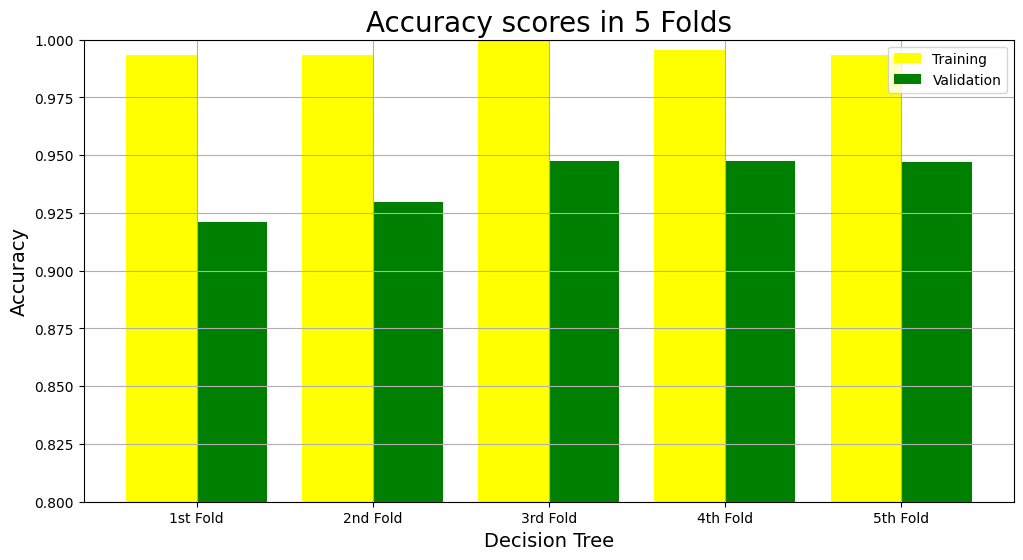

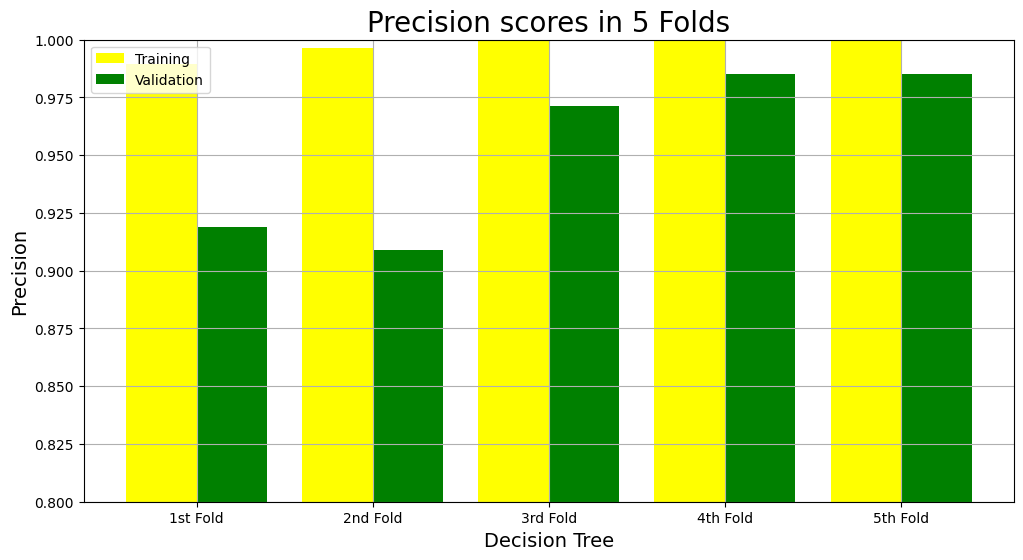

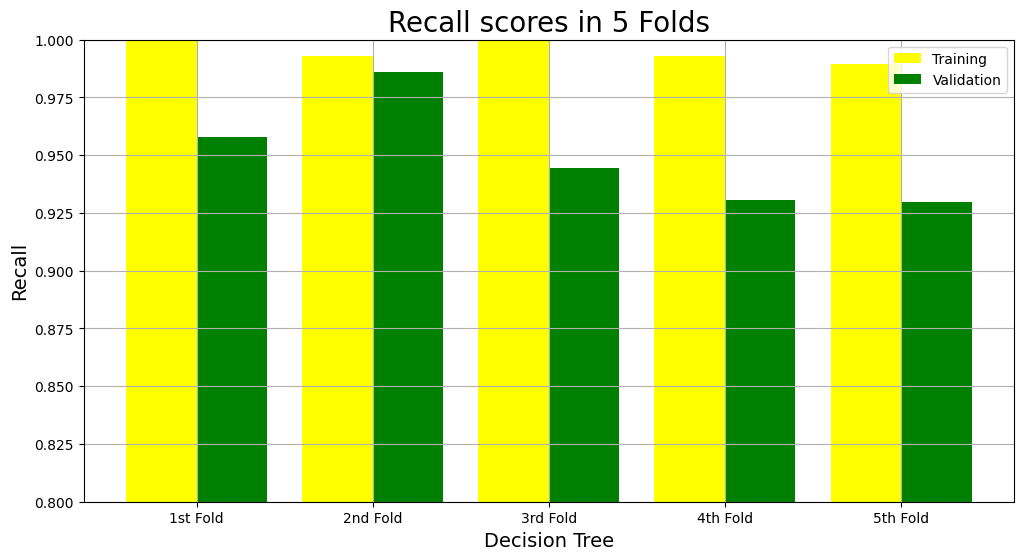

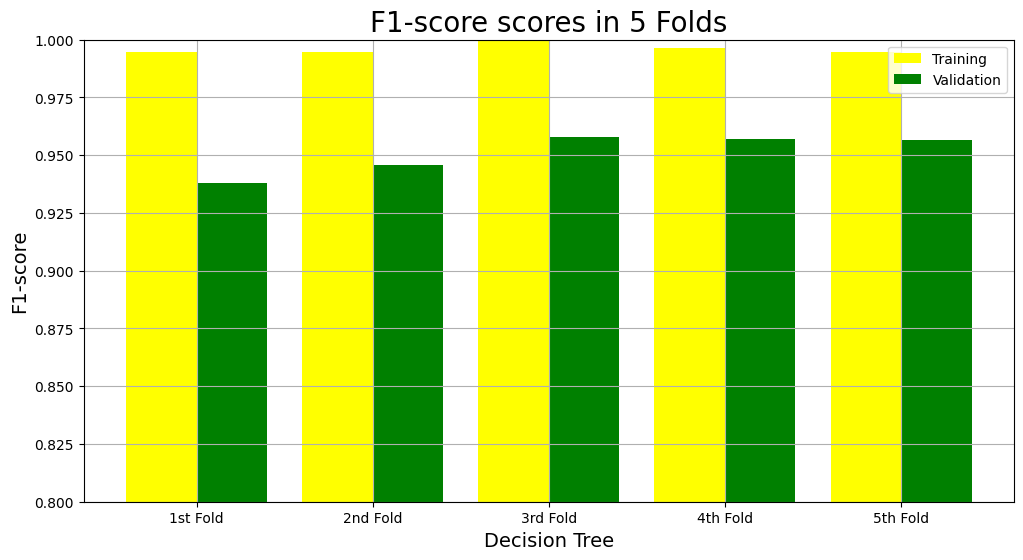

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

cancer= datasets.load_breast_cancer()
df=pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = pd.Series(cancer.target)
df.head(3)

x=df.drop(columns=['target'])
y=df['target']
def cross_validation (model, _x, _y, _cv=5):
  _scoring = ['accuracy', 'precision', 'recall', 'f1']
  results = cross_validate(estimator=model, X=_x, y=_y, cv=_cv, scoring = _scoring, return_train_score=True)

  print("Mean Training Accuracy scores: ",results['train_accuracy'].mean())

  print("Mean Training Precision scores: ",results['train_precision'].mean())

  print("Mean Training Recall scores: ",results['train_recall'].mean())

  print("Mean Training F1 scores: ",results['train_f1'].mean())

  print("Mean Validation Accuracy scores: ",results['test_accuracy'].mean())

  print("Mean Validation Precision scores: ",results['test_precision'].mean())

  print("Mean Validation Recall scores: ",results['test_recall'].mean())

  print("Mean Validation F1 scores: ",results['test_f1'].mean())
  return{ "Training Accuracy scores": results['train_accuracy'],

              "Training Precision scores": results['train_precision'],

              "Training Recall scores": results['train_recall'],

              "Training F1 scores": results['train_f1'],

              "Validation Accuracy scores": results['test_accuracy'],

              "Validation Precision scores": results['test_precision'],

              "Validation Recall scores": results['test_recall'],

              "Validation F1 scores": results['test_f1'],

  }
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(criterion="entropy", min_samples_split=5,random_state=0)
decision_tree_result = cross_validation(decision_tree_model, x, y, 5)
def plot_result(x_label, y_label, plot_title, train_data, val_data):
  plt.figure(figsize=(12,6))

  labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]

  X_axis = np.arange(len(labels))

  ax = plt.gca()

  plt.ylim(0.8, 1)

  plt.bar(X_axis-0.2, train_data, 0.4, color='yellow', label="Training")

  plt.bar(X_axis+0.2, val_data, 0.4, color="green", label='Validation')

  plt.title(plot_title, fontsize=20)

  plt.xticks(X_axis, labels)

  plt.xlabel(x_label, fontsize=14)

  plt.ylabel(y_label, fontsize=14)

  plt.legend()

  plt.grid(True)
model_name = "Decision Tree"
plot_result(model_name, "Accuracy", "Accuracy scores in 5 Folds",
            decision_tree_result["Training Accuracy scores"],
            decision_tree_result["Validation Accuracy scores"])
plt.show()
model_name = "Decision Tree"

plot_result(model_name, "Precision","Precision scores in 5 Folds", decision_tree_result["Training Precision scores"],
            decision_tree_result["Validation Precision scores"])
plt.show()
model_name= "Decision Tree"
plot_result(model_name, "Recall", "Recall scores in 5 Folds", decision_tree_result["Training Recall scores"],
            decision_tree_result["Validation Recall scores"])
plt.show()
model_name = "Decision Tree"
plot_result(model_name, "F1-score", "F1-score scores in 5 Folds", decision_tree_result["Training F1 scores"],
            decision_tree_result["Validation F1 scores"])
plt.show()
